In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def classifier_train_volume(clf, X, Y, n):
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=n)
    clf.fit(train_x, train_y)
    pred_test =  clf.predict(test_x)
    pred_train = clf.predict(train_x)
    return (accuracy_score(train_y, pred_train), accuracy_score(test_y, pred_test))

In [ ]:
def plotting_validation_curve(train_scores, test_scores, param_range, title, param):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title(f"Validation Curve with {title}")
    plt.xlabel(param)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
    plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
    )
    plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
    plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
    plt.legend(loc="best")

Downloading Dataset
---

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, train_size = 0.8)

SVC Model with Gaussian kernel == 0.01
---

In [ ]:
clf = SVC(C=0.01)
clf.fit(X_train, y_train)
print(f' Train score {clf.score(X_train, y_train)}')
print(f' Test score {clf.score(X_test, y_test)}')

 Train score 0.7516483516483516
 Test score 0.7807017543859649


As for now, model score isn`t as good as we want it to be
---

In [ ]:
training_scores = []
test_scores = []
numbers = []

print(X_2d.shape, y.shape)

for i in np.linspace(0.1, 0.9, 81).tolist():
    clf = SVC(C=0.01, kernel='rbf')
    X_train, X_test, y_train, y_test = train_test_split(X_2d, y, train_size = round(i,2), shuffle = True, random_state = 42)
    clf.fit(X_train, y_train)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

(569, 2) (569,)


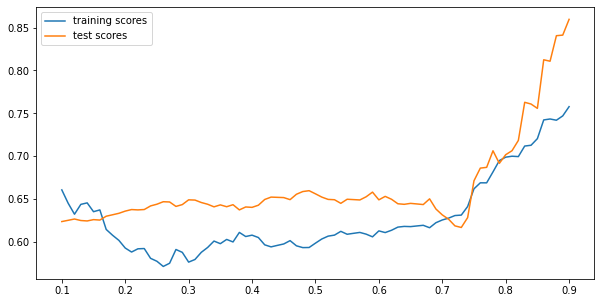

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0.1, 0.9, 81), training_scores, label="training scores")
plt.plot(np.linspace(0.1, 0.9, 81), test_scores, label="test scores")
plt.legend(loc="best")

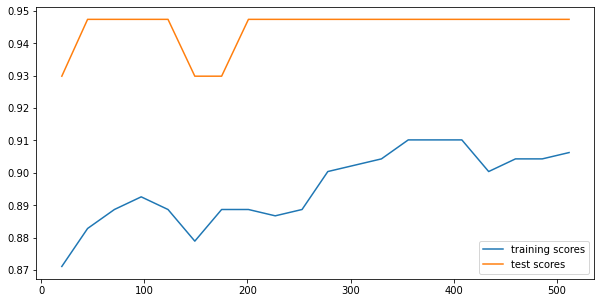

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

1. Dependency of scores on size of data shows that size of data with more than 150 samples growing continuously that`s means that we can take more samples
***
2. If we take less samples we can see that score of the model falling rapidly
***
3. Number of features may cause more score but we have to plot scatterplots or corr matrix
***
4. Maybe new features can increase accuracy of the model, but we haven`t it, but we can split existing features
***
5. Polynomial features can be a good idea as i mentioned in paragraph below
***
6. More complicated models can add addition score to model, also there is gradient boosting that almost always can increase score of the model
***
7. More simplificant model on that samples isn`t good idea, due to importance of varience of features in cancer prediction model
***
8. Regularization of model - can regularize weights of model by addition to Loss function cost by huge weight
***
9. Deregularization of model - without regularization at first isn`t good idea

Increasing data size, increasing features and evaluating by crossvalidating
---

In [ ]:
model = SVC(C=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
clf.fit(X_train, y_train)
print(f' Train score {clf.score(X_train, y_train)}')
print(f' Test score {clf.score(X_test, y_test)}')

 Train score 0.8973105134474327
 Test score 0.912621359223301


In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X), 20):
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

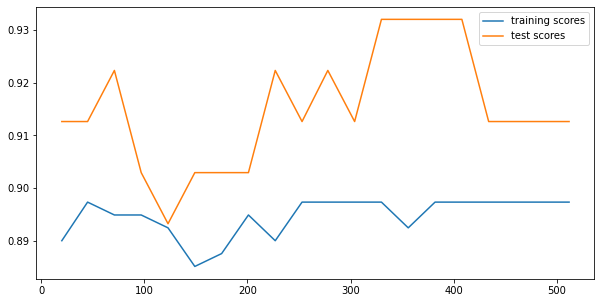

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Adding polynomial features, Cross Validation and save size of data and features
---

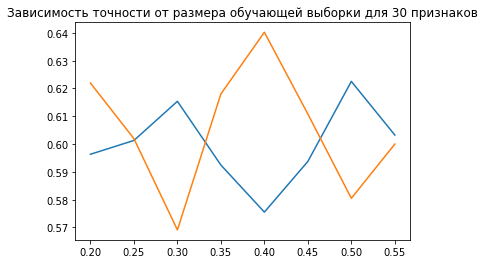

In [ ]:
volumes = np.arange(0.2, 0.6, 0.05)
vol_accuracy = np.array([classifier_train_volume(SVC(C=0.01),X,y, n) for n in volumes])
plt.plot(volumes, vol_accuracy[:, 0], label='train')
plt.title('Зависимость точности от размера обучающей выборки для 30 признаков')
plt.plot(volumes, vol_accuracy[:, 1], label='test')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std

model = SVC(C=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
poly = PolynomialFeatures(2)
poly.fit_transform(X_train)

pipeline = Pipeline(steps=[('t', poly), ('m', model)])
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.040)


Add Regularization
---

In [ ]:
training_scores = []
test_scores = []
numbers = []
for i in np.linspace(0.001, 1_000, 1_000):
    clf = SVC(C=i, kernel='rbf')
    X = X_train
    y = y_train
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

Optimal C is 7
---

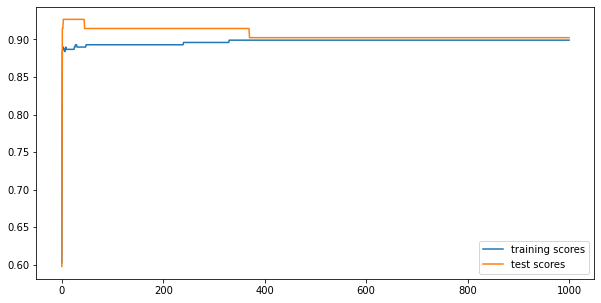

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

In [ ]:
model = SVC(C=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
poly = PolynomialFeatures(2)
poly.fit_transform(X_train)

pipeline = Pipeline(steps=[('t', poly), ('m', model)])
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.890 (0.031)


C best is 7
---

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [i//100 for i in range(1,1_000)]}
model = SVC()
clf = GridSearchCV(model, param_grid)
clf.fit(X_train, y_train)
clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
495 fits failed out of a total of 4995.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
495 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", li

{'C': 2}

Linear kernel
---

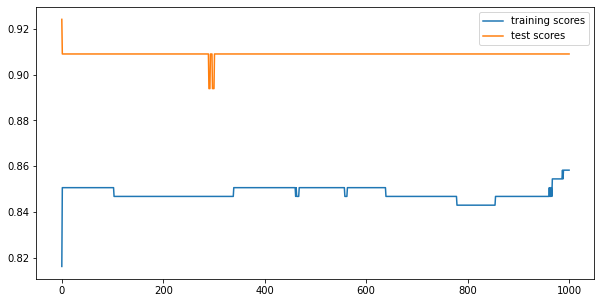

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(0.001, 1_000, 1_000):
    clf = SVC(C=i, kernel='linear')
    X = X_train
    y = y_train
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.linspace(0.001, 1_000, 1_000)}
model = SVC()
clf = GridSearchCV(model, param_grid)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 2.003}

In [ ]:
model = SVC(C =1.002, kernel = 'linear')
clf.fit(X_train, y_train)
print(f' Train score {clf.score(X_train, y_train)}')
print(f' Test score {clf.score(X_test, y_test)}')

 Train score 0.896551724137931
 Test score 0.9242424242424242


In [ ]:
model = SVC(C = 7, kernel = 'rbf')
clf.fit(X_train, y_train)
print(f' Train score {clf.score(X_train, y_train)}')
print(f' Test score {clf.score(X_test, y_test)}')

 Train score 0.896551724137931
 Test score 0.9242424242424242


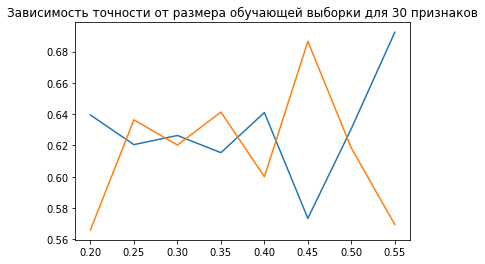

In [ ]:
volumes = np.arange(0.2, 0.6, 0.05)
vol_accuracy = np.array([classifier_train_volume(SVC(C=0.01),X,y, n) for n in volumes])
plt.plot(volumes, vol_accuracy[:, 0], label='train')
plt.title('Зависимость точности от размера обучающей выборки для 30 признаков')
plt.plot(volumes, vol_accuracy[:, 1], label='test')
plt.show()

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y)
clf = SVC(C=0.01)
clf.fit(train_x, train_y)
pred_test =  clf.predict(test_x)
pred_train = clf.predict(train_x)
print(accuracy_score(train_y, pred_train))
print(accuracy_score(test_y, pred_test))

0.10987379361544172
0.08666666666666667


In [ ]:
def classifier_sample_size(clf, X, Y, n):
    X = X[:, :n]
    train_x, test_x, train_y, test_y = train_test_split(X, Y)
    clf.fit(train_x, train_y)
    pred_test =  clf.predict(test_x)
    pred_train = clf.predict(train_x)
    return (accuracy_score(train_y, pred_train), accuracy_score(test_y, pred_test))

Лучшее количество признаков: 29 , точности:  [0.2887899 0.24     ]


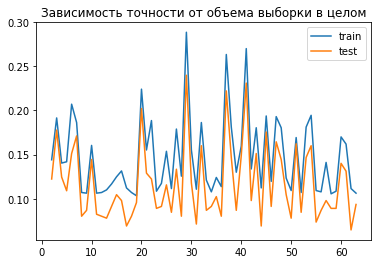

Лучшее количество признаков: 34 , точности:  [0.29844098 0.25777778]


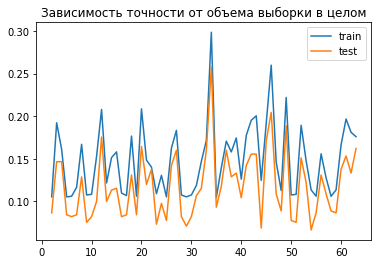

Лучшее количество признаков: 47 , точности:  [0.28359317 0.21555556]


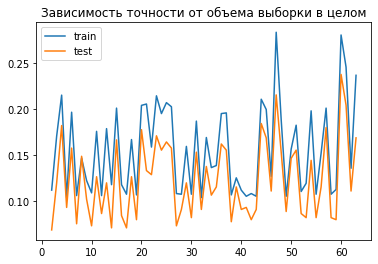

Лучшее количество признаков: 59 , точности:  [0.30289532 0.24222222]


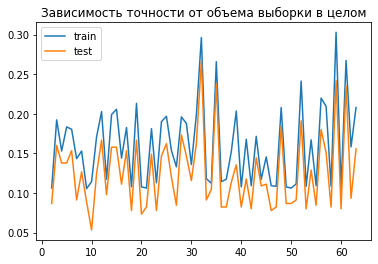

In [ ]:
for _ in range(4):
    plt.title('Зависимость точности от объема выборки в целом')
    volumes = np.arange(2, X.shape[1])
    vol_accuracy = np.array([classifier_sample_size(SVC(C=0.01),X,y, n) for n in volumes])
    best_index = np.argmax(vol_accuracy[:, :1])
    print('Лучшее количество признаков:', volumes[best_index], ', точности: ', vol_accuracy[best_index])
    plt.plot(volumes, vol_accuracy[:, 0], label='train')
    plt.plot(volumes, vol_accuracy[:, 1], label='test')
    plt.legend()
    plt.show()

In [ ]:
search = GridSearchCV(estimator=SVC(),
             param_grid={'C': np.geomspace(1, 10**4, num=4), 'kernel': ('linear', 'rbf')})
search.fit(X,y)
search.best_params_

{'C': 21.544346900318832, 'kernel': 'rbf'}

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y)
clf = SVC(C=21.544346900318832, kernel = 'rbf')
clf.fit(train_x, train_y)
pred_test =  clf.predict(test_x)
pred_train = clf.predict(train_x)
print(accuracy_score(train_y, pred_train))
print(accuracy_score(test_y, pred_test))

1.0
0.9844444444444445


In [ ]:
import numpy as np
def my_custom_loss_func(ground_truth, predictions):
    diff = np.abs(ground_truth - predictions).max()
    return np.log(1 + diff)
loss  = make_scorer(my_custom_loss_func, greater_is_better=False)
score = make_scorer(my_custom_loss_func, greater_is_better=True)
ground_truth = [[1, 1]]
predictions  = [0, 1]
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf = clf.fit(ground_truth, predictions)
loss(clf,ground_truth, predictions) 

score(clf,ground_truth, predictions)